# Loan Application Status Prediction

**Project Description**

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female)

3.	Married - This refers to applicant being in a state of matrimony

4.	Dependents - This refres to persons who depends on the applicants for survival

5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university

6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer

7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.

8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.

9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.

10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant

11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.

12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.

13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.

You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset.

Dataset Link-  https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv


In [1]:
# IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [2]:
# read & store the data in DF

df_raw = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df_raw.sample(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
363,LP002178,Male,Yes,0,Graduate,No,3013,3033.0,95.0,300.0,NaN,Urban,Y
413,LP002332,Male,Yes,0,Not Graduate,No,2253,2033.0,110.0,360.0,1.0,Rural,Y
416,LP002341,Female,No,1,Graduate,No,2600,0.0,160.0,360.0,1.0,Urban,N


# Non Graphical Analysis

In [3]:
# Shape of the dataset
print("Rows, column",df_raw.shape)

# Finding the number of unique values in a column

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique())

Rows, column (614, 13)
Loan_ID : 614
Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 203
Loan_Amount_Term : 10
Credit_History : 2
Property_Area : 3
Loan_Status : 2


1. Rows : 614, columns : 13

2. Loan_ID: Can be dropped as they are unique identifier and each row has unique Loan_ID

3. Gender, Married, Dependents, Education, Credit History, Loan_Amount_term, Property_Area, Loan_Status are categorical data

4. Applicant Income, Coapplicant Income, Loan Amount are continous numeric labels


Loan ID being a unique identifier is not needed, dropping the label

In [4]:
df_raw.drop('Loan_ID', axis=1, inplace = True)
print(df_raw.shape)

(614, 12)


Null Values found in all labels except :

Education, ApplicantIncome, CoapplicantIncome, Property_Area, Loan_Status

(Visualize nulls using Heat Map)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


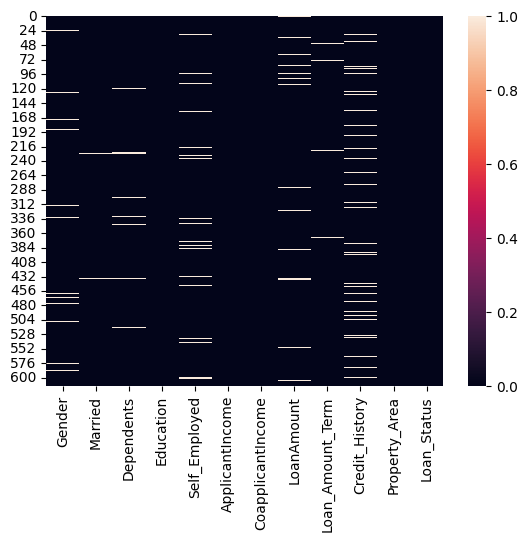

In [5]:
# Visualize non null values using heat-map

sns.heatmap(df_raw.isnull())

df_raw.info()

**Check the data info & Unique value count**

In [6]:
# Finding the number of unique values in a column

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype, ', Null Count:',df_raw[index].isnull().sum())

Gender : 2 , type: object , Null Count: 13
Married : 2 , type: object , Null Count: 3
Dependents : 4 , type: object , Null Count: 15
Education : 2 , type: object , Null Count: 0
Self_Employed : 2 , type: object , Null Count: 32
ApplicantIncome : 505 , type: int64 , Null Count: 0
CoapplicantIncome : 287 , type: float64 , Null Count: 0
LoanAmount : 203 , type: float64 , Null Count: 22
Loan_Amount_Term : 10 , type: float64 , Null Count: 14
Credit_History : 2 , type: float64 , Null Count: 50
Property_Area : 3 , type: object , Null Count: 0
Loan_Status : 2 , type: object , Null Count: 0


**TREATING NULL VALUES**

1. Gender/Married/Self_Employed/Credit_History: Create a new category Unknown

2. Dependents/Loan_Amount_term : Create a new category Unknown

3. Loan_Amount: Random Forest Based Imputations

**Applying Label Encoding before using RF Imputer**

In [7]:
# Applying Label Encoder on categorical data (Object)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_raw['Gender'] = le.fit_transform(df_raw['Gender'])
df_raw['Married'] = le.fit_transform(df_raw['Married'])
df_raw['Dependents'] = le.fit_transform(df_raw['Dependents'])
df_raw['Education'] = le.fit_transform(df_raw['Education'])
df_raw['Self_Employed'] = le.fit_transform(df_raw['Self_Employed'])
df_raw['Property_Area'] = le.fit_transform(df_raw['Property_Area'])
df_raw['Credit_History'] = le.fit_transform(df_raw['Credit_History'])
df_raw['Loan_Amount_Term'] = le.fit_transform(df_raw['Loan_Amount_Term'])
df_raw['Loan_Status'] = le.fit_transform(df_raw['Loan_Status'])

In [8]:
df_raw.sample(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
559,0,1,0,0,0,4180,2306.0,182.0,8,1,1,1
339,0,0,0,0,0,4160,0.0,71.0,8,1,1,1
64,0,0,0,0,0,4166,0.0,116.0,8,0,1,0


**Applying label Encoder to the dataset assigns NaN an encoded value, thus making null count = 0**  (for categorical labels only)

In [9]:
# Finding the number of unique values in a column

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype, ', Null Count:',df_raw[index].isnull().sum())

Gender : 3 , type: int64 , Null Count: 0
Married : 3 , type: int64 , Null Count: 0
Dependents : 5 , type: int64 , Null Count: 0
Education : 2 , type: int64 , Null Count: 0
Self_Employed : 3 , type: int64 , Null Count: 0
ApplicantIncome : 505 , type: int64 , Null Count: 0
CoapplicantIncome : 287 , type: float64 , Null Count: 0
LoanAmount : 203 , type: float64 , Null Count: 22
Loan_Amount_Term : 11 , type: int64 , Null Count: 0
Credit_History : 3 , type: int64 , Null Count: 0
Property_Area : 3 , type: int64 , Null Count: 0
Loan_Status : 2 , type: int64 , Null Count: 0


**Applying Random Forest Imputer for Missing values in Loan_amount & Loan_Amount Term**

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [11]:
col = 'LoanAmount'

# Split data into known and unknown
known_dt = df_raw[df_raw[col].notnull()]  # Rows with known values
unknown_dt = df_raw[df_raw[col].isnull()]  # Rows with missing values

# Select features and target
X = known_dt.drop(col, axis=1, inplace = False)  # Features
y = known_dt[col]  # Target

# Train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X, y)

# Predict missing values
X_unknown = unknown_dt.drop(col, axis=1, inplace = False)  # Features for unknown data
missing_values = rf_clf.predict(X_unknown)

# Update the dataset with imputed values
df_raw.loc[df_raw[col].isnull(), col] = missing_values


In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    int64  
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 57.7 KB


Null Values has been treated & No null values in dataset

In [13]:
# Finding the number of unique values in a column

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype, ', Null Count:',df_raw[index].isnull().sum())

Gender : 3 , type: int64 , Null Count: 0
Married : 3 , type: int64 , Null Count: 0
Dependents : 5 , type: int64 , Null Count: 0
Education : 2 , type: int64 , Null Count: 0
Self_Employed : 3 , type: int64 , Null Count: 0
ApplicantIncome : 505 , type: int64 , Null Count: 0
CoapplicantIncome : 287 , type: float64 , Null Count: 0
LoanAmount : 203 , type: float64 , Null Count: 0
Loan_Amount_Term : 11 , type: int64 , Null Count: 0
Credit_History : 3 , type: int64 , Null Count: 0
Property_Area : 3 , type: int64 , Null Count: 0
Loan_Status : 2 , type: int64 , Null Count: 0


**Check Statistical Summary**

In [14]:
df_raw.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,147.353420,7.713355,0.936482,1.037459,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,86.692066,1.161895,0.471924,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,8.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,8.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,8.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,10.000000,2.000000,2.000000,1.000000


High std deviation in ApplicantIncome, Coapplicantincome & LoanAmount Labels

In [15]:
 df_raw.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.650817
Loan_Amount_Term    -2.819192
Credit_History      -0.199751
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

**Skewness is high for Applicant Income , CoApplicant Income, Loan AMount**

# GRAPHICAL ANALYSIS

**UNIVARIATE**

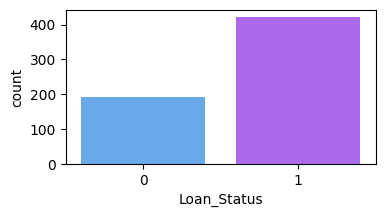

1    422
0    192
Name: Loan_Status, dtype: int64


In [16]:
# Check Distribution of the target label


mp.figure(figsize=(4,2))
sns.countplot(x=df_raw['Loan_Status'], palette = 'cool')
mp.show()

print(df_raw['Loan_Status'].value_counts())

**CLearly the dataset is not balanced, applying SMOTE to balance the data**

In [17]:
# Import & apply SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=3)
X = df_raw.iloc[:,:-1]
y = df_raw['Loan_Status']

print(X.shape)
print(y.shape)

X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)


df_lps_bal = pd.DataFrame(data = X_resampled, columns = df_raw.columns.to_list())
df_lps_bal['Loan_Status'] = y_resampled

print(df_lps_bal.shape)

df_lps_bal.head(4)

(614, 11)
(614,)
(844, 11)
(844,)
(844, 12)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,141.0,8,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,8,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,8,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,8,1,2,1


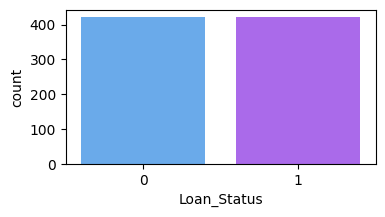

1    422
0    422
Name: Loan_Status, dtype: int64


In [ ]:
# Re-Check Distribution of the target label

mp.figure(figsize=(4,2))
sns.countplot(x=df_lps_bal['Loan_Status'], palette = 'cool')
mp.show()

print(df_lps_bal['Loan_Status'].value_counts())

**Data is now balanced**

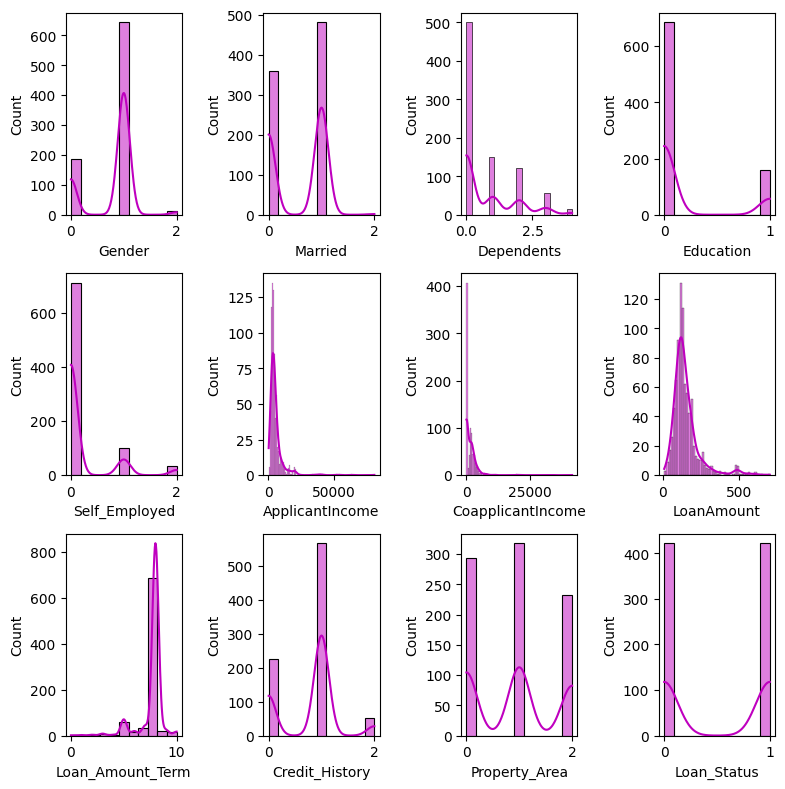

In [18]:
# Histplot to check distribution

mp.figure(figsize=(8,8))
pnum = 1

for index in df_lps_bal.columns.to_list():
  if(pnum<=12):
    ax = mp.subplot(3,4, pnum)
    sns.histplot(df_lps_bal[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

*Clearly the histplot shows that dataset needs to be scaled*

**Applying Robust Scalar to Standardize the data**

In [19]:
# Applying RobustScaler Scalar

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Apply Scaling on Continous labels ApplicantIncome, CoapplicantIncome, LoanIncome

df_lps_dta = df_lps_bal[['ApplicantIncome','CoapplicantIncome','LoanAmount' ]]
df_lps_sca = pd.DataFrame(scaler.fit_transform(df_lps_dta),columns = df_lps_dta.columns.to_list())

df_lps_bal['ApplicantIncome']  = df_lps_sca['ApplicantIncome']
df_lps_bal['CoapplicantIncome']  = df_lps_sca['CoapplicantIncome']
df_lps_bal['LoanAmount']  = df_lps_sca['LoanAmount']

df_lps_bal.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.661433,-0.412450,0.187523,8,1,2,1
1,1,1,1,0,0,0.242955,0.265082,0.000000,8,1,0,0
2,1,1,0,0,1,-0.280307,-0.412450,-0.894339,8,1,2,1


In [20]:
df_lps_bal.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,0.793839,0.577014,0.740521,0.188389,0.197867,0.552827,0.258958,0.311618,7.669431,0.796209,0.926540,0.500000
std,0.441243,0.501474,1.049303,0.391254,0.487028,1.989401,1.188342,1.280773,1.140629,0.536837,0.786485,0.500296
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.222378,-0.412450,-1.716554,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,-0.306999,-0.412450,-0.378652,8.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.500000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.693001,0.587550,0.621348,8.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,25.502686,18.308175,8.250999,10.000000,2.000000,2.000000,1.000000


*std deviation is now reduced, after applying Min-Max Scalar*

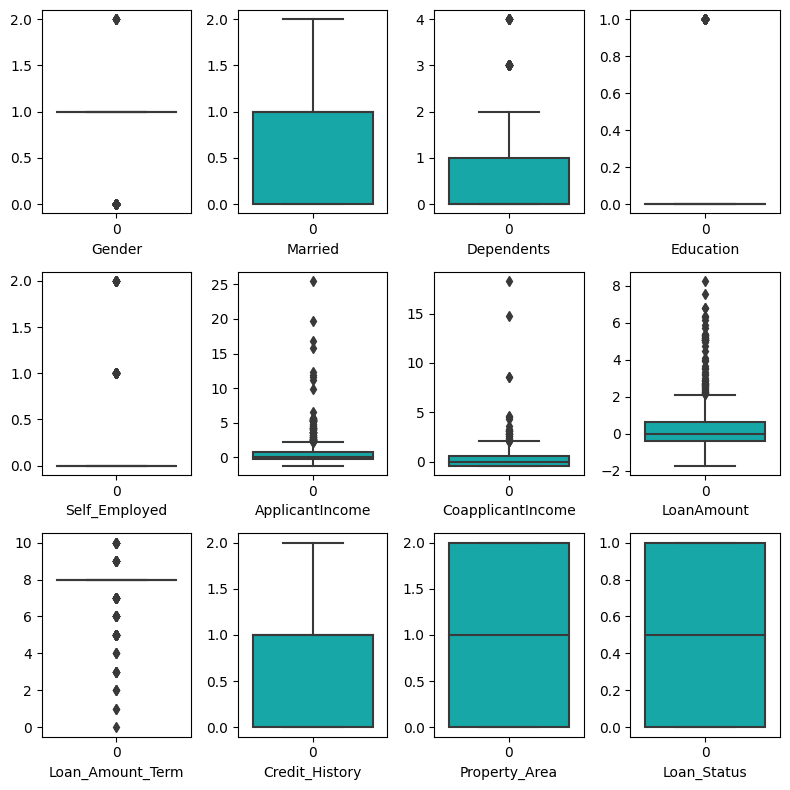

In [21]:
# Visulize outliers using BoxPlot

mp.figure(figsize=(8,8))
pnum = 1

for index in df_lps_bal.columns.to_list():
  if(pnum<=12):
    ax = mp.subplot(3,4, pnum)
    sns.boxplot(df_lps_bal[index], color = 'c')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

*Few Oultiers can be seen in some labels*

(844, 12)
(745, 12)


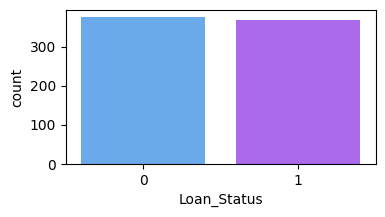

0    376
1    369
Name: Loan_Status, dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
388,1,1,0,0,0,-0.500785,0.673488,0.115399,8,1,2,1
286,0,0,0,0,1,-0.412528,0.358984,-0.418320,7,1,1,0
147,1,1,1,0,0,-0.763573,0.227791,-1.413633,8,1,2,1


In [22]:
# Removing Outliers where |Z-score| > 3
# With Loan_status as target

df_lps_ft1 = df_lps_bal[::-1]
df_lps_tg1 = df_lps_bal['Loan_Status']

df_lps_fil1 = df_lps_bal[(np.abs(sp.zscore(df_lps_ft1)) <= 3).all(axis=1)]

print(df_lps_ft1.shape)
print(df_lps_fil1.shape)

mp.figure(figsize=(4,2))
sns.countplot(x = df_lps_fil1['Loan_Status'], palette = 'cool')
mp.show()

print(df_lps_fil1['Loan_Status'].value_counts())
df_lps_fil1.sample(3)

*After removing outliers, we have 745 rows*

*Data can still be considered as balanced*

***BIVARIATE ANALYSIS***

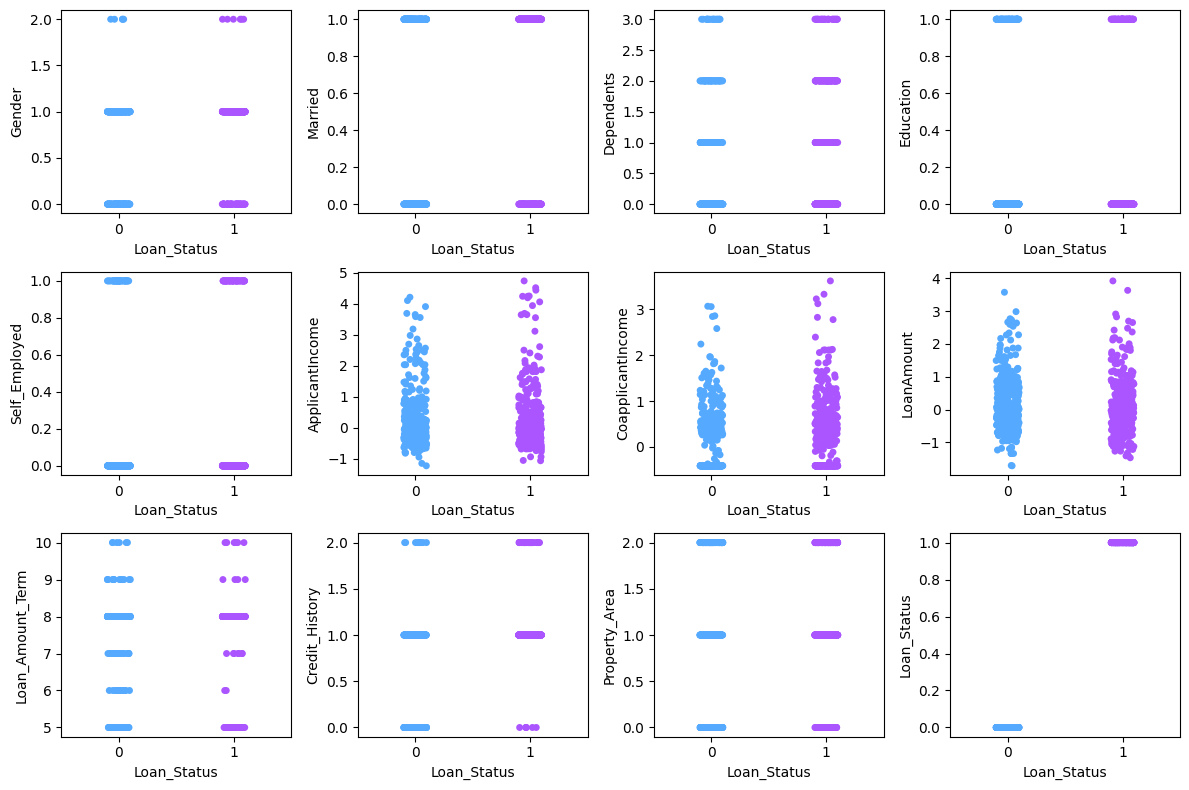

In [24]:
# Stripplpt wrt Loan_Status

mp.figure(figsize=(12,8))
pnum = 1

for index in df_lps_fil1.columns.to_list():
  if(pnum<=12):
    ax = mp.subplot(3,4, pnum)
    sns.stripplot(x=df_lps_fil1['Loan_Status'], y =df_lps_fil1[index], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()


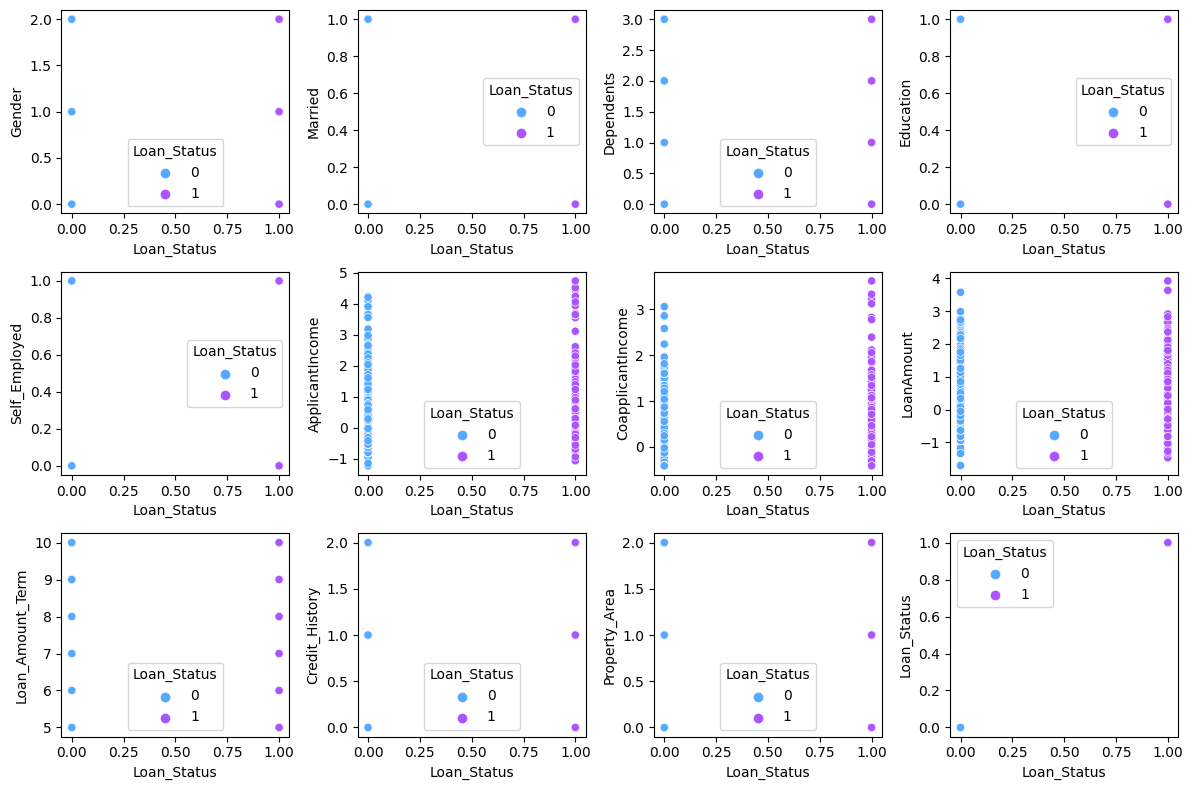

In [25]:
# Scatterplot wrt Loan_Status

mp.figure(figsize=(12,8))
pnum = 1

for index in df_lps_fil1.columns.to_list():
  if(pnum<=12):
    ax = mp.subplot(3,4, pnum)
    sns.scatterplot(x=df_lps_fil1['Loan_Status'], y =df_lps_fil1[index], palette = 'cool', hue = df_lps_fil1['Loan_Status'])
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Loan Status = 1, where applicant & coapplicant income is high

*Multivariate*

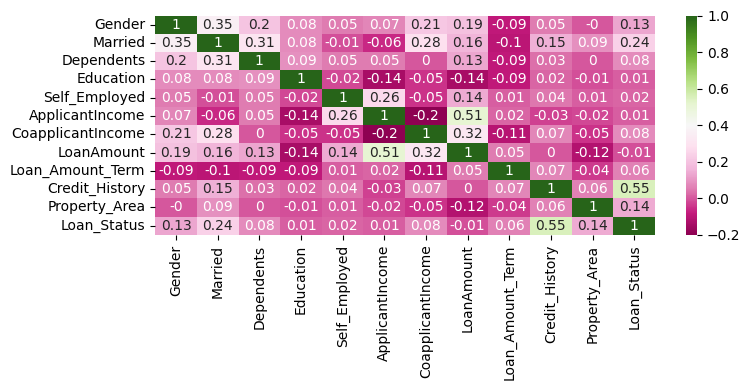

In [26]:
mp.figure(figsize=(8,4))
sns.heatmap(round(df_lps_fil1.corr(),2), cmap = 'PiYG', annot = True)
mp.tight_layout()
mp.show()


Most of the labels are not showing signifivant coreelation

To some extent Loan Status is showing moderate +ve correlation with Loan_Status

**Analysis of Skewness**

In [27]:
df_lps_fil1.skew()

Gender              -0.876619
Married             -0.263169
Dependents           1.143064
Education            1.545708
Self_Employed        2.312462
ApplicantIncome      1.992265
CoapplicantIncome    1.409279
LoanAmount           1.119950
Loan_Amount_Term    -1.970860
Credit_History      -0.119761
Property_Area        0.132378
Loan_Status          0.018831
dtype: float64

For continous numeric labels ApplicantIncome & CoaaplicantIncome, LoanAmount skewness is slighly high, applying cuberoot transformation to these labels

In [28]:
# Applying cuberoot transformation on continous labels where skewness is high and not within acceptable limits <=1, also check std deviation

df_lps_fil1['ApplicantIncome'] = np.cbrt(df_lps_fil1['ApplicantIncome'])
df_lps_fil1['CoapplicantIncome'] = np.cbrt(df_lps_fil1['CoapplicantIncome'])
df_lps_fil1['LoanAmount'] = np.cbrt(df_lps_fil1['LoanAmount'])

print('Std. Dev')
print(df_lps_fil1.std())
print('\n')

print('Skewness')
print(df_lps_fil1.skew())


Std. Dev
Gender               0.445463
Married              0.496077
Dependents           0.957244
Education            0.396182
Self_Employed        0.327676
ApplicantIncome      0.808566
CoapplicantIncome    0.811724
LoanAmount           0.806654
Loan_Amount_Term     0.885571
Credit_History       0.537827
Property_Area        0.782702
Loan_Status          0.500314
dtype: float64


Skewness
Gender              -0.876619
Married             -0.263169
Dependents           1.143064
Education            1.545708
Self_Employed        2.312462
ApplicantIncome      0.235621
CoapplicantIncome    0.090793
LoanAmount           0.133595
Loan_Amount_Term    -1.970860
Credit_History      -0.119761
Property_Area        0.132378
Loan_Status          0.018831
dtype: float64


*Skewness is now within permissible limit*

*Checking Multicollinearity using VIF*

In [29]:
# Checking VIF

# Separating Target label Loan_Status
df_lps_vf = df_lps_fil1.iloc[:,:-1]
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df_lps_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_lps_vf.values,i) for i in range(len(df_lps_vf.columns))]

vif

,Feature,VIF Val
0,Gender,4.797329
1,Married,3.162572
2,Dependents,1.716457
3,Education,1.299260
4,Self_Employed,1.205038
5,ApplicantIncome,1.814729
6,CoapplicantIncome,1.640024
7,LoanAmount,1.716580
8,Loan_Amount_Term,6.826404
9,Credit_History,3.184547


*Multicollinearity has been treated*

# MODELLING

Separarting Target Label & Independent Labels



In [30]:
# Separate independent & target labels

x_df = df_lps_vf
y_df = df_lps_fil1['Loan_Status']

# Import Libraraies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


print(x_df.shape)
print(y_df.shape)

print(x_df.sample(3))
print(y_df.sample(3))

(745, 11)
(745,)
     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
515       1        1           3          0              0        -0.501688   
602       1        1           3          0              0         0.849560   
584       1        1           1          0              0        -0.705209   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
515           1.040880    0.682094                 8               1   
602          -0.744372    0.000000                 8               1   
584           0.765652    0.637961                 8               0   

     Property_Area  
515              0  
602              2  
584              0  
221    1
696    0
834    0
Name: Loan_Status, dtype: int64


# RandomForestClassifier

Hypertuning RFC Parameters

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_rfc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_split': 10, 'random_state': 55}


In [32]:
# Training the RFC Model with given best hypertuning parameters

RFC = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])
max_acc = 0
rst_rfc = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  RFC.fit(x_train, y_train)
  pred = RFC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_rfc = i

print('Best Random State:', rst_rfc, 'with accuracy score:', max_acc)

Best Random State: 12 with accuracy score: 0.912751677852349


# ExtraTreesClassifier

*Hypertuning Parameters ExtraTreeClassifier*



In [33]:
from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(etc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_etc = randomCV.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 8, 'min_samples_split': 7, 'random_state': 67}


In [34]:
# Training the ETC  Model with given best hypertuning parameters
ETC = ExtraTreeClassifier(criterion = bp_etc['criterion'], max_depth = bp_etc['max_depth'], max_features = bp_etc['max_features'], min_samples_split = bp_etc['min_samples_split'], random_state = bp_etc['random_state'] )
max_acc = 0
rst_etc = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  ETC.fit(x_train, y_train)
  pred = ETC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_etc = i

print('Best Random State:', rst_etc, 'with accuracy score:', max_acc)


Best Random State: 12 with accuracy score: 0.8590604026845637


# DecisionTreeClassifier

*Hypertuning Parameter for DecisionTreeClassifier*

In [35]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(dtc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_dtc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 9, 'min_samples_split': 5, 'random_state': 69}


In [36]:
# Training the DTC  Model with given best hypertuning parameters
DTC = DecisionTreeClassifier(criterion = bp_dtc['criterion'], max_depth = bp_dtc['max_depth'], max_features = bp_dtc['max_features'], min_samples_split = bp_dtc['min_samples_split'], random_state = bp_dtc['random_state'] )
max_acc = 0
rst_dtc = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  DTC.fit(x_train, y_train)
  pred = DTC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_dtc = i

print('Best Random State:', rst_dtc, 'with accuracy score:', max_acc)

Best Random State: 74 with accuracy score: 0.8322147651006712


# KNN MODEL

Hypertuning KNN Model

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

param = {"n_neighbors": [3,5,7],
   "weights": ['uniform', 'distance'],
   "p": [1,2]}

samples = 8
randomCV = RandomizedSearchCV(knc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_knc = randomCV.best_params_


{'weights': 'distance', 'p': 1, 'n_neighbors': 5}


In [38]:
# Training KNN Model

max_acc = 0
rst_knc = 0
KNN = KNeighborsClassifier(weights = bp_knc['weights'], p = bp_knc['p'], n_neighbors = bp_knc['n_neighbors'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_knc = i

print('Best Random State:', rst_knc, 'with accuracy score:', max_acc)

Best Random State: 75 with accuracy score: 0.8389261744966443


# SVC

Hypertuning

In [39]:
from sklearn.svm import SVC

svc = SVC()
param = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

samples = 8
randomCV = RandomizedSearchCV(svc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_svc = randomCV.best_params_


{'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}


In [40]:
# Training SVC Model

max_acc = 0
rst_sv = 0
SV = SVC(C = bp_svc['C'], kernel = bp_svc['kernel'], gamma = bp_svc['gamma'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  SV.fit(x_train, y_train)
  pred = SV.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_sv = i

print('Best Random State:', rst_sv, 'with accuracy score:', max_acc)

Best Random State: 12 with accuracy score: 0.8389261744966443


# ADABOOST CLASSIFIER

Hypertuning Adaboost

In [41]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

param = {"n_estimators": sp_randint(1, 100),
   "learning_rate": sp_randint(1, 15),
   "algorithm": ['SAMME.R', 'SAMME'],
    "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(abc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_df, y_df)
print(randomCV.best_params_)

bp_abc = randomCV.best_params_

{'algorithm': 'SAMME', 'learning_rate': 6, 'n_estimators': 93, 'random_state': 70}


In [42]:
# Training ABC Model

max_acc = 0
rst_abc = 0
ABC = AdaBoostClassifier(n_estimators = bp_abc['n_estimators'], learning_rate = bp_abc['learning_rate'],
                         algorithm = bp_abc['algorithm'],random_state = bp_abc['random_state'] )

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)

  ABC.fit(x_train, y_train)
  pred = ABC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_abc = i

print('Best Random State:', rst_abc, 'with accuracy score:', max_acc)

Best Random State: 12 with accuracy score: 0.8389261744966443


# Checking CV Scores of the Models

In [46]:
# Checking CV Score

from sklearn.model_selection import cross_val_score

cv = 5
model_list = [RFC, ETC, DTC, KNN, SV, ABC]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_df,y_df)
  print(mdl, ': Avg CV Score is ', round(cvs.mean(),4))
  print('\n')

RandomForestClassifier(criterion='entropy', max_features=8,
                       min_samples_split=10, random_state=55) : Avg CV Score is  0.8255


ExtraTreeClassifier(max_depth=4, max_features=8, min_samples_split=7,
                    random_state=67) : Avg CV Score is  0.7611


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=9,
                       min_samples_split=5, random_state=69) : Avg CV Score is  0.7544


KNeighborsClassifier(p=1, weights='distance') : Avg CV Score is  0.7772


SVC(C=0.1, gamma=0.01, kernel='linear') : Avg CV Score is  0.7638


AdaBoostClassifier(algorithm='SAMME', learning_rate=6, n_estimators=93,
                   random_state=70) : Avg CV Score is  0.7638




Max Accuracy & Avg CV Score suggests using Random Forest Classifer Model

# Checking accuracy, score, confusion matrix & classsification reports for RandomforestClassifier



In [47]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix

RFC_SEL = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = rst_rfc, test_size = 0.2)
RFC_SEL.fit(x_train, y_train)
pred = RFC_SEL.predict(x_test)

acc_score = accuracy_score(y_test, pred)
print('Accuracy of the Model:', round(acc_score,4))
print('\n')

print('Confusion Matrix:', '\n',confusion_matrix(y_test, pred))
print('\n')

print('Classification Report:', '\n',classification_report(y_test, pred))
print('\n')


Accuracy of the Model: 0.9128


Confusion Matrix: 
 [[67  8]
 [ 5 69]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91        75
           1       0.90      0.93      0.91        74

    accuracy                           0.91       149
   macro avg       0.91      0.91      0.91       149
weighted avg       0.91      0.91      0.91       149





# Checking AUC-ROC Curve

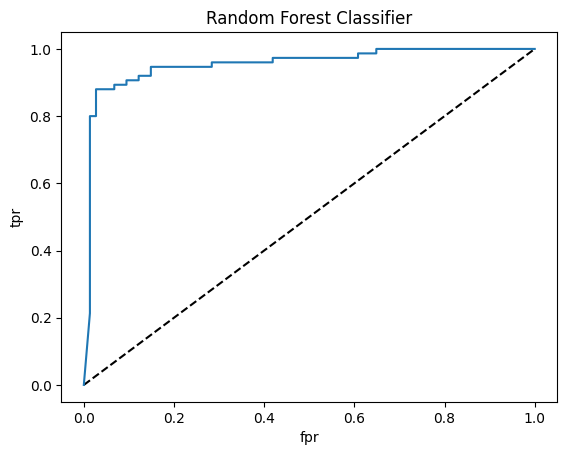

In [48]:
# Checking ROC_AUC Curve

y_pred_prob = RFC_SEL.predict_proba(x_test)[:, 0]

# 0 & others

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label = 0)

import matplotlib.pyplot as mpp

mp.plot([0,1],[0,1], 'k--')
mp.xlabel('fpr')
mp.ylabel('tpr')
mp.title('Random Forest Classifier')
mp.plot(fpr,tpr)
mp.show()

# Saving the best Model

In [49]:
import joblib

joblib.dump(RFC_SEL, 'RFC_LSP.pkl')

['RFC_LSP.pkl']

In [50]:
# Load the saved model

load_RFC_LSP = joblib.load('RFC_LSP.pkl')

RFC_LSP = load_RFC_LSP

In [51]:
# Function to Predict Region

def pred_lsp(input):

  inp = np.array(input)
  type_loan_st  =  RFC_LSP.predict(inp.reshape(1, -1))
  reg_loan_lst = le.inverse_transform(type_loan_st)
  pred_lst = [type_loan_st, reg_loan_lst]

  return pred_lst

In [52]:
# checking randomly selected rows

rws = [233, 342, 167, 365]

for row in rws:
  print('Actual:', y_df[row])
  print('Predicted by Model:', pred_lsp(x_df.iloc[row,:])[0])
  print('Decoded value:', pred_lsp(x_df.iloc[row,:])[1])
  print('\n')

Actual: 1
Predicted by Model: [1]
Decoded value: ['Y']


Actual: 1
Predicted by Model: [1]
Decoded value: ['Y']


Actual: 1
Predicted by Model: [1]
Decoded value: ['Y']


Actual: 0
Predicted by Model: [0]
Decoded value: ['N']




In [53]:
feat = x_df.columns.tolist()
df_x_sample = df_raw[feat]

df_y_sample =df_raw['Loan_Status']

In [54]:
# checking randomly selected rows

rws = [33, 342, 67, 256, 414]

for row in rws:

  print(row)
  print('Actual:', df_y_sample[row])
  print('Predicted by Model:', pred_lsp(df_x_sample.iloc[row,:])[0])
  print('Decoded value:', pred_lsp(df_x_sample.iloc[row,:])[1])
  print('\n')

33
Actual: 1
Predicted by Model: [1]
Decoded value: ['Y']


342
Actual: 1
Predicted by Model: [1]
Decoded value: ['Y']


67
Actual: 1
Predicted by Model: [1]
Decoded value: ['Y']


256
Actual: 0
Predicted by Model: [0]
Decoded value: ['N']


414
Actual: 0
Predicted by Model: [0]
Decoded value: ['N']




**Model seems to be working well**